## [Eng de Dados] Trabalho Final - DataOps
#### Benício B. de A. Carneiro
10/05/2025


In [22]:
%pip install pandasql
%pip install seaborn

import pandas as pd 
from pandasql import sqldf
import numpy as np
import sqlite3
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Análise Exploratória da Tabela

In [23]:
conn_sqlite = sqlite3.connect('salarios-servidores.db')
df_ = pd.read_sql_query("""
    SELECT *
    FROM 'staging-abril'
""", conn_sqlite)


In [24]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116813 entries, 0 to 116812
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  116813 non-null  object 
 1   total_proventos     116813 non-null  float64
 2   proventos_liquidos  116813 non-null  float64
 3   total_descontos     116813 non-null  float64
 4   desconto_teto       116813 non-null  float64
 5   outros_descontos    116813 non-null  float64
 6   criacao             116813 non-null  object 
 7   atualizacao         116813 non-null  object 
 8   competencia         116813 non-null  object 
 9   situacao_funcional  116813 non-null  object 
 10  dsc_cargo           116813 non-null  object 
 11  codigo_orgao        116718 non-null  object 
 12  descricao_orgao     116813 non-null  object 
 13  sigla               116813 non-null  object 
dtypes: float64(5), object(9)
memory usage: 12.5+ MB


In [25]:
df_.describe()

,total_proventos,proventos_liquidos,total_descontos,desconto_teto,outros_descontos
count,116813.000000,116813.000000,116813.000000,116813.000000,116813.000000
mean,6186.057533,3934.868981,2251.188552,79.908648,2171.279903
std,6883.375174,3849.641609,3539.260694,1011.510853,3033.825995
min,0.030000,0.000000,0.000000,0.000000,0.000000
25%,1697.660000,1411.160000,205.900000,0.000000,205.900000
50%,4630.230000,3053.500000,1187.950000,0.000000,1187.460000
75%,8122.260000,5019.450000,3110.930000,0.000000,3107.180000
max,151809.180000,99650.560000,66297.530000,50203.540000,44299.020000


In [26]:
df_.isnull().sum()

id                     0
total_proventos        0
proventos_liquidos     0
total_descontos        0
desconto_teto          0
outros_descontos       0
criacao                0
atualizacao            0
competencia            0
situacao_funcional     0
dsc_cargo              0
codigo_orgao          95
descricao_orgao        0
sigla                  0
dtype: int64

In [27]:
situacao_total_proventos = sqldf('''
    SELECT situacao_funcional, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY situacao_funcional
    ''')
situacao_total_proventos.set_index('situacao_funcional', inplace=True)

In [28]:
cargo_total_proventos = sqldf('''
    SELECT dsc_cargo, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY dsc_cargo
    ''')
cargo_total_proventos.set_index('dsc_cargo', inplace=True)

In [29]:
sigla_total_proventos = sqldf('''
    SELECT sigla, 
        max(total_proventos) as max_total, 
        max(proventos_liquidos) as max_liquidos, 
        min(total_proventos) as min_total, 
        min(proventos_liquidos) as min_liquidos
    FROM df_ 
    GROUP BY sigla
    ''')
sigla_total_proventos.set_index('sigla', inplace=True)

In [30]:
sigla_situacao = sqldf('''
    SELECT sigla, situacao_funcional,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

In [31]:
sigla_cargo = sqldf('''
    SELECT sigla, dsc_cargo,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

In [32]:
cargo_situacao = sqldf('''
    SELECT dsc_cargo, situacao_funcional,
    count(id)
    FROM df_ 
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''')

### Top 5 Maiores Ocorrências (%)

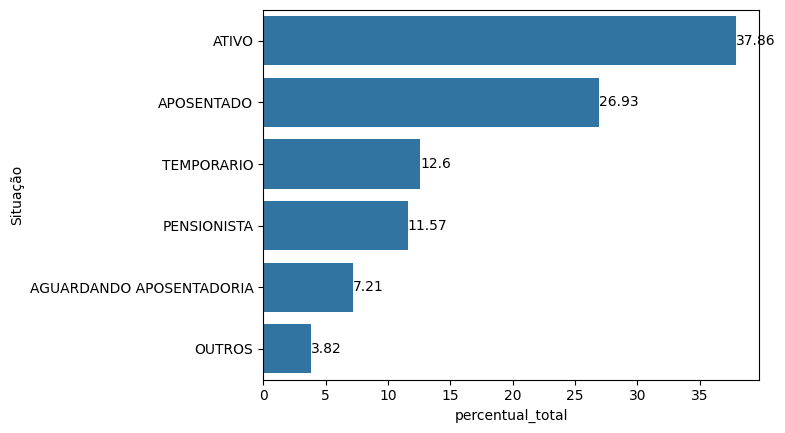

In [33]:
situacao_top = df_['situacao_funcional'].value_counts().head().to_frame()
situacao_outros = pd.DataFrame({'count': len(df_)-situacao_top['count'].sum()}, index= ['OUTROS'])
situacao_top = pd.concat([situacao_top,situacao_outros])
situacao_top['percentual_total'] = round(situacao_top['count']*100/len(df_),2)

situacao_plot = sns.barplot(data=situacao_top, x='percentual_total', y=situacao_top.index, orient='h')
situacao_plot.bar_label(situacao_plot.containers[0], fontsize=10)
situacao_plot.set_ylabel('Situação');

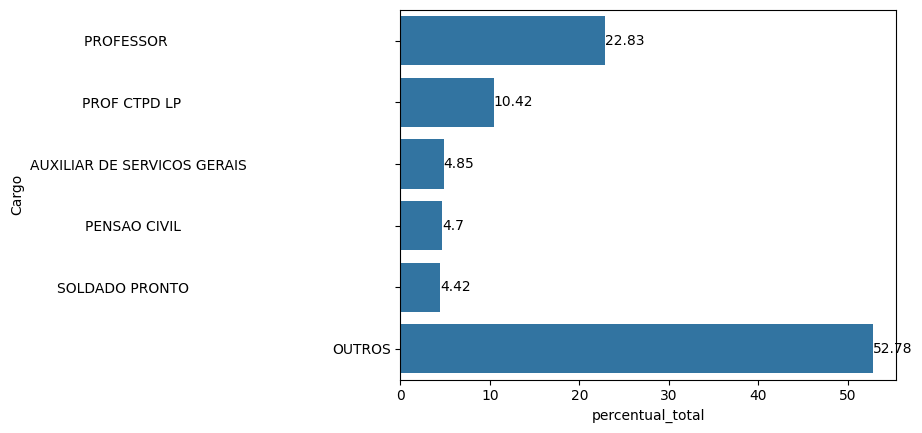

In [34]:
cargo_top = df_['dsc_cargo'].value_counts().head().to_frame()
cargo_outros = pd.DataFrame({'count': len(df_)-cargo_top['count'].sum()}, index= ['OUTROS'])
cargo_top = pd.concat([cargo_top,cargo_outros])
cargo_top['percentual_total'] = round(cargo_top['count']*100/len(df_),2)

cargo_plot = sns.barplot(data=cargo_top, x='percentual_total', y=cargo_top.index, orient='h')
cargo_plot.bar_label(cargo_plot.containers[0], fontsize=10)
cargo_plot.set_ylabel('Cargo');

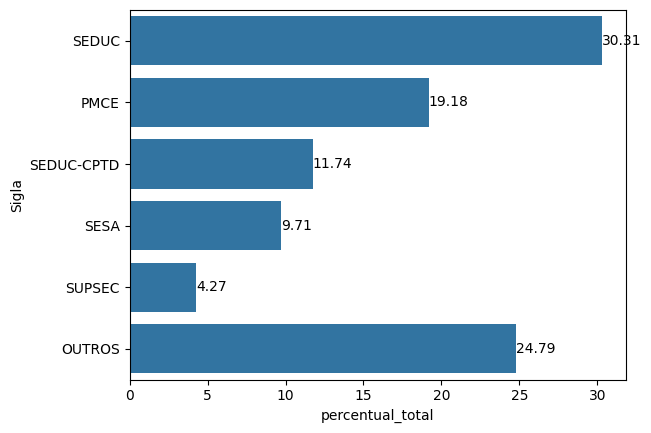

In [35]:
sigla_top = df_['sigla'].value_counts().head().to_frame()
sigla_outros = pd.DataFrame({'count': len(df_)-sigla_top['count'].sum()}, index= ['OUTROS'])
sigla_top = pd.concat([sigla_top,sigla_outros])
sigla_top['percentual_total'] = round(sigla_top['count']*100/len(df_),2)

sigla_plot = sns.barplot(data=sigla_top, x='percentual_total', y=sigla_top.index, orient='h')
sigla_plot.bar_label(sigla_plot.containers[0], fontsize=10)
sigla_plot.set_ylabel('Sigla');

### Top 5 Maiores e Menores

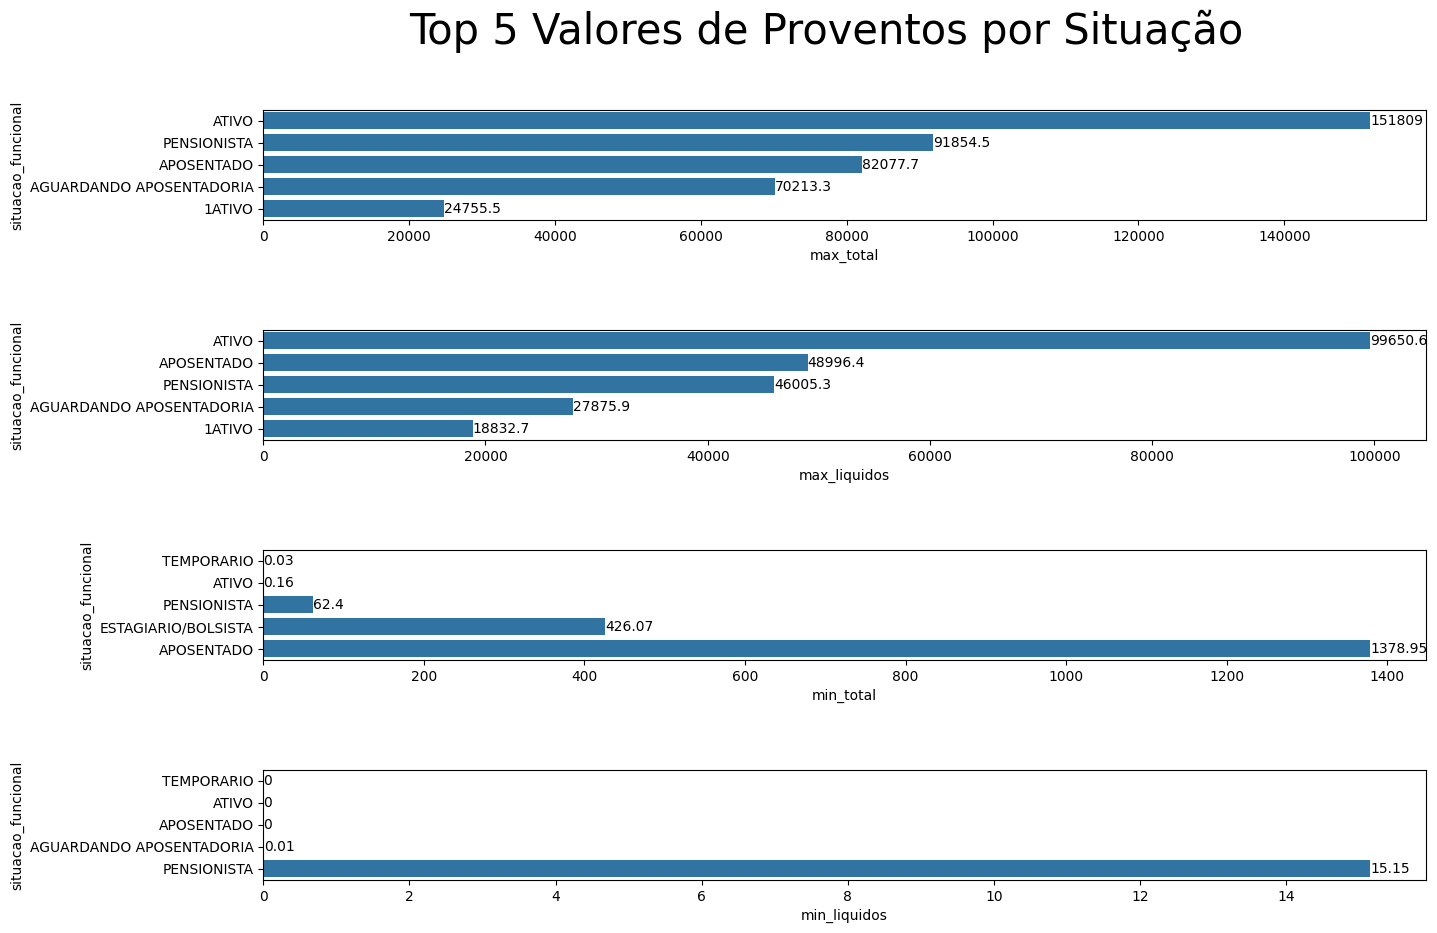

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = situacao_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = situacao_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = situacao_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = situacao_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='situacao_funcional', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='situacao_funcional', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='situacao_funcional', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='situacao_funcional', orient='h')
plot4.bar_label(plot4.containers[0], fontsize=10);



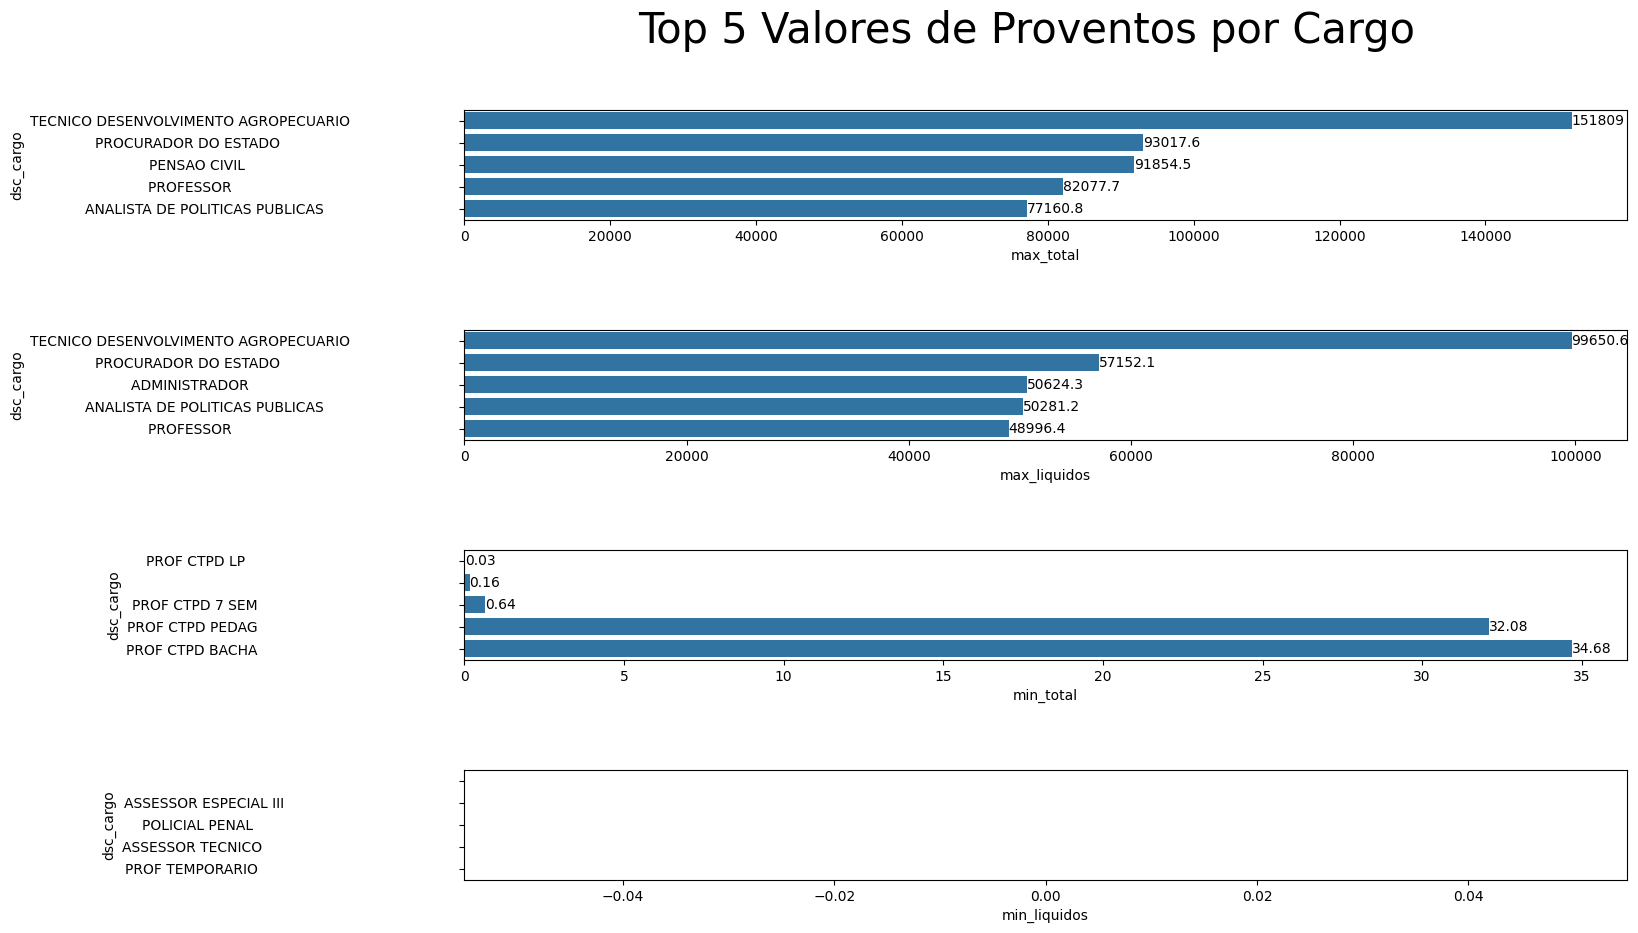

In [39]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Cargo', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = cargo_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = cargo_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = cargo_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = cargo_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='dsc_cargo', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='dsc_cargo', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='dsc_cargo', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='dsc_cargo', orient='h')

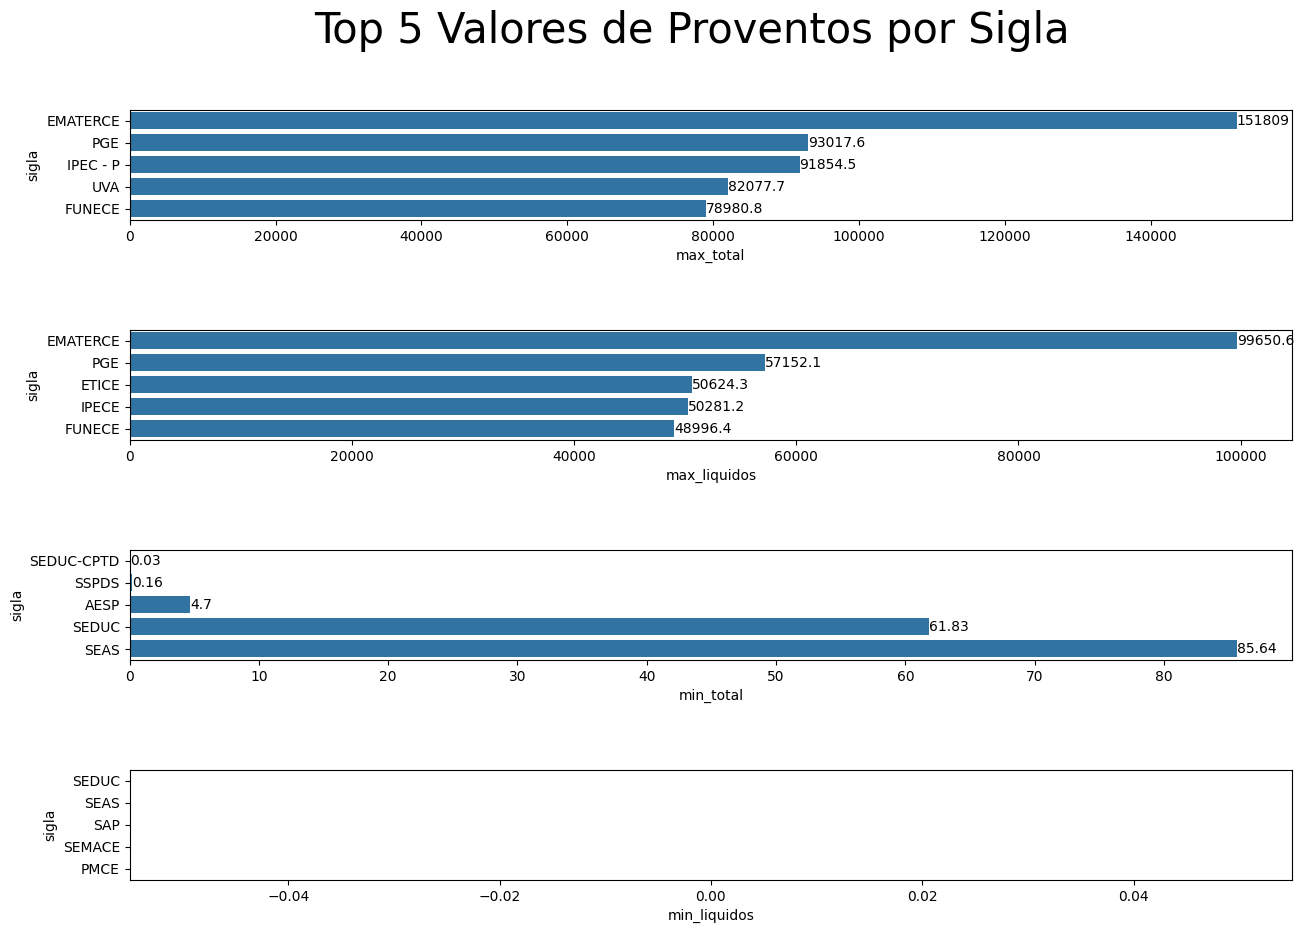

In [40]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

fig.suptitle('Top 5 Valores de Proventos por Sigla', size=30.0, ha='center')
fig.subplots_adjust(wspace=1, hspace=1)

data1 = sigla_total_proventos['max_total'].sort_values(ascending=False).head().to_frame()
data2 = sigla_total_proventos['max_liquidos'].sort_values(ascending=False).head().to_frame()
data3 = sigla_total_proventos['min_total'].sort_values(ascending=True).head().to_frame()
data4 = sigla_total_proventos['min_liquidos'].sort_values(ascending=True).head().to_frame()

plot1 = sns.barplot(ax=axes[0], data=data1, x='max_total', y='sigla', orient='h')
plot1.bar_label(plot1.containers[0], fontsize=10);
plot2 = sns.barplot(ax=axes[1], data=data2, x='max_liquidos', y='sigla', orient='h')
plot2.bar_label(plot2.containers[0], fontsize=10);
plot3 = sns.barplot(ax=axes[2], data=data3, x='min_total', y='sigla', orient='h')
plot3.bar_label(plot3.containers[0], fontsize=10);
plot4 = sns.barplot(ax=axes[3], data=data4, x='min_liquidos', y='sigla', orient='h')

In [41]:
situacao_total_top = df_.groupby(["situacao_funcional"])["total_proventos"].median().sort_values(ascending=False).dropna()
situacao_std_total_top = df_.groupby(["situacao_funcional"])["total_proventos"].std().sort_values(ascending=False).dropna()
situacao_liq_top = df_.groupby(["situacao_funcional"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
situacao_std_liq_top = df_.groupby(["situacao_funcional"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()

In [42]:
cargo_total_top = df_.groupby(["dsc_cargo"])["total_proventos"].median().sort_values(ascending=False).dropna()
cargo_std_total_top = df_.groupby(["dsc_cargo"])["total_proventos"].std().sort_values(ascending=False).dropna()
cargo_liq_top = df_.groupby(["dsc_cargo"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
cargo_std_liq_top = df_.groupby(["dsc_cargo"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()


In [43]:
sigla_total_top = df_.groupby(["sigla"])["total_proventos"].median().sort_values(ascending=False).dropna()
sigla_std_total_top = df_.groupby(["sigla"])["total_proventos"].std().sort_values(ascending=False).dropna()
sigla_liq_top = df_.groupby(["sigla"])["proventos_liquidos"].median().sort_values(ascending=False).dropna()
sigla_std_liq_top = df_.groupby(["sigla"])["proventos_liquidos"].std().sort_values(ascending=False).dropna()


### Top 5 Maiores e Menores Medianas/Desvios

In [44]:
print('-------------------------------------------SITUAÇÃO-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(situacao_total_top.head())
print()
print(' - Desvio-padrão')
print(situacao_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(situacao_liq_top.head())
print()
print(' - Desvio-padrão')
print(situacao_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(situacao_total_top.tail())
print()
print(' - Desvio-padrão')
print(situacao_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(situacao_liq_top.tail())
print()
print(' - Desvio-padrão')
print(situacao_std_liq_top.tail())


-------------------------------------------SITUAÇÃO-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
situacao_funcional
17ATIVO    18566.64
8ATIVO     13924.97
9ATIVO     13924.97
0ATIVO     13924.97
5ATIVO      8159.50
Name: total_proventos, dtype: float64

 - Desvio-padrão
situacao_funcional
7ATIVO        7762.386150
1ATIVO        7691.064301
ATIVO         7513.373602
APOSENTADO    6821.472495
6ATIVO        6550.671124
Name: total_proventos, dtype: float64

-> Top 5 Maiores Proventos Líquidos
 - Mediana
situacao_funcional
17ATIVO    14345.770
8ATIVO     10615.440
0ATIVO     10540.730
9ATIVO     10183.930
5ATIVO      6102.975
Name: proventos_liquidos, dtype: float64

 - Desvio-padrão
situacao_funcional
1ATIVO    5385.752508
7ATIVO    4927.204591
6ATIVO    4711.370054
5ATIVO    4663.198283
ATIVO     3980.191935
Name: proventos_liquidos, dtype: float64

-> Top 5 Menores Proventos Totais
 - Mediana
situacao_funcional
2ATIVO                 2394.03
1

In [45]:
print('-------------------------------------------CARGO-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(cargo_total_top.head())
print()
print(' - Desvio-padrão')
print(cargo_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(cargo_liq_top.head())
print()
print(' - Desvio-padrão')
print(cargo_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(cargo_total_top.tail())
print()
print(' - Desvio-padrão')
print(cargo_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(cargo_liq_top.tail())
print()
print(' - Desvio-padrão')
print(cargo_std_liq_top.tail())
print()

-------------------------------------------CARGO-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
dsc_cargo
ANALISTA DE POLITICAS PUBLICAS                                  50348.09
PROCURADOR DO ESTADO                                            48525.86
AUDITOR FISCAL CONTABIL-FINANCEIRO DA RECEITA ESTADUAL          45654.15
AUDITOR FISCAL DE TECNOLOGIA DA INFORMACAO DA RECEITA ESTADU    45566.68
Assistente Técnico - Mecânica                                   45372.98
Name: total_proventos, dtype: float64

 - Desvio-padrão
dsc_cargo
TECNICO DESENVOLVIMENTO AGROPECUARIO                            26158.704328
PENS MONTEP PGE                                                 18774.162844
ARQUITETO                                                       17491.180638
PROCURADOR AUTARQUICO                                           17165.020110
PENS CIVIL TCE                                                  16527.279106
Name: total_proventos, dtype: float64

In [46]:
print('-------------------------------------------SIGLA-------------------------------------------')
print('-> Top 5 Maiores Proventos Totais')
print(' - Mediana')
print(sigla_total_top.head())
print()
print(' - Desvio-padrão')
print(sigla_std_total_top.head())
print()
print('-> Top 5 Maiores Proventos Líquidos')
print(' - Mediana')
print(sigla_liq_top.head())
print()
print(' - Desvio-padrão')
print(sigla_std_liq_top.head())
print()
print('-> Top 5 Menores Proventos Totais')
print(' - Mediana')
print(sigla_total_top.tail())
print()
print(' - Desvio-padrão')
print(sigla_std_total_top.tail())
print()
print('-> Top 5 Menores Proventos Líquidos')
print(' - Mediana')
print(sigla_liq_top.tail())
print()
print(' - Desvio-padrão')
print(sigla_liq_top.tail())
print()

-------------------------------------------SIGLA-------------------------------------------
-> Top 5 Maiores Proventos Totais
 - Mediana
sigla
SEFAZ     34562.885
CGE       30082.650
ARCE      28215.400
ETICE     13625.350
FUNECE    13374.220
Name: total_proventos, dtype: float64

 - Desvio-padrão
sigla
IPECE     24358.512478
PGE       20915.350758
SEFAZ     13981.845246
SEPLAG    13657.591509
FUNECE    13427.331088
Name: total_proventos, dtype: float64

-> Top 5 Maiores Proventos Líquidos
 - Mediana
sigla
CGE      17421.110
SEFAZ    16200.720
ARCE     16003.595
IPECE     8650.780
ETICE     8641.595
Name: proventos_liquidos, dtype: float64

 - Desvio-padrão
sigla
IPECE       14765.999803
PGE         12725.146956
SEPLAG       8152.479641
EMATERCE     7832.591925
ETICE        7599.988285
Name: proventos_liquidos, dtype: float64

-> Top 5 Menores Proventos Totais
 - Mediana
sigla
CGD           1754.75
SDA           1541.72
SEFAZ - PE    1412.00
AESP          1022.28
SEDUC-CPTD     524.17


### Curvas de Desvio e Mediana

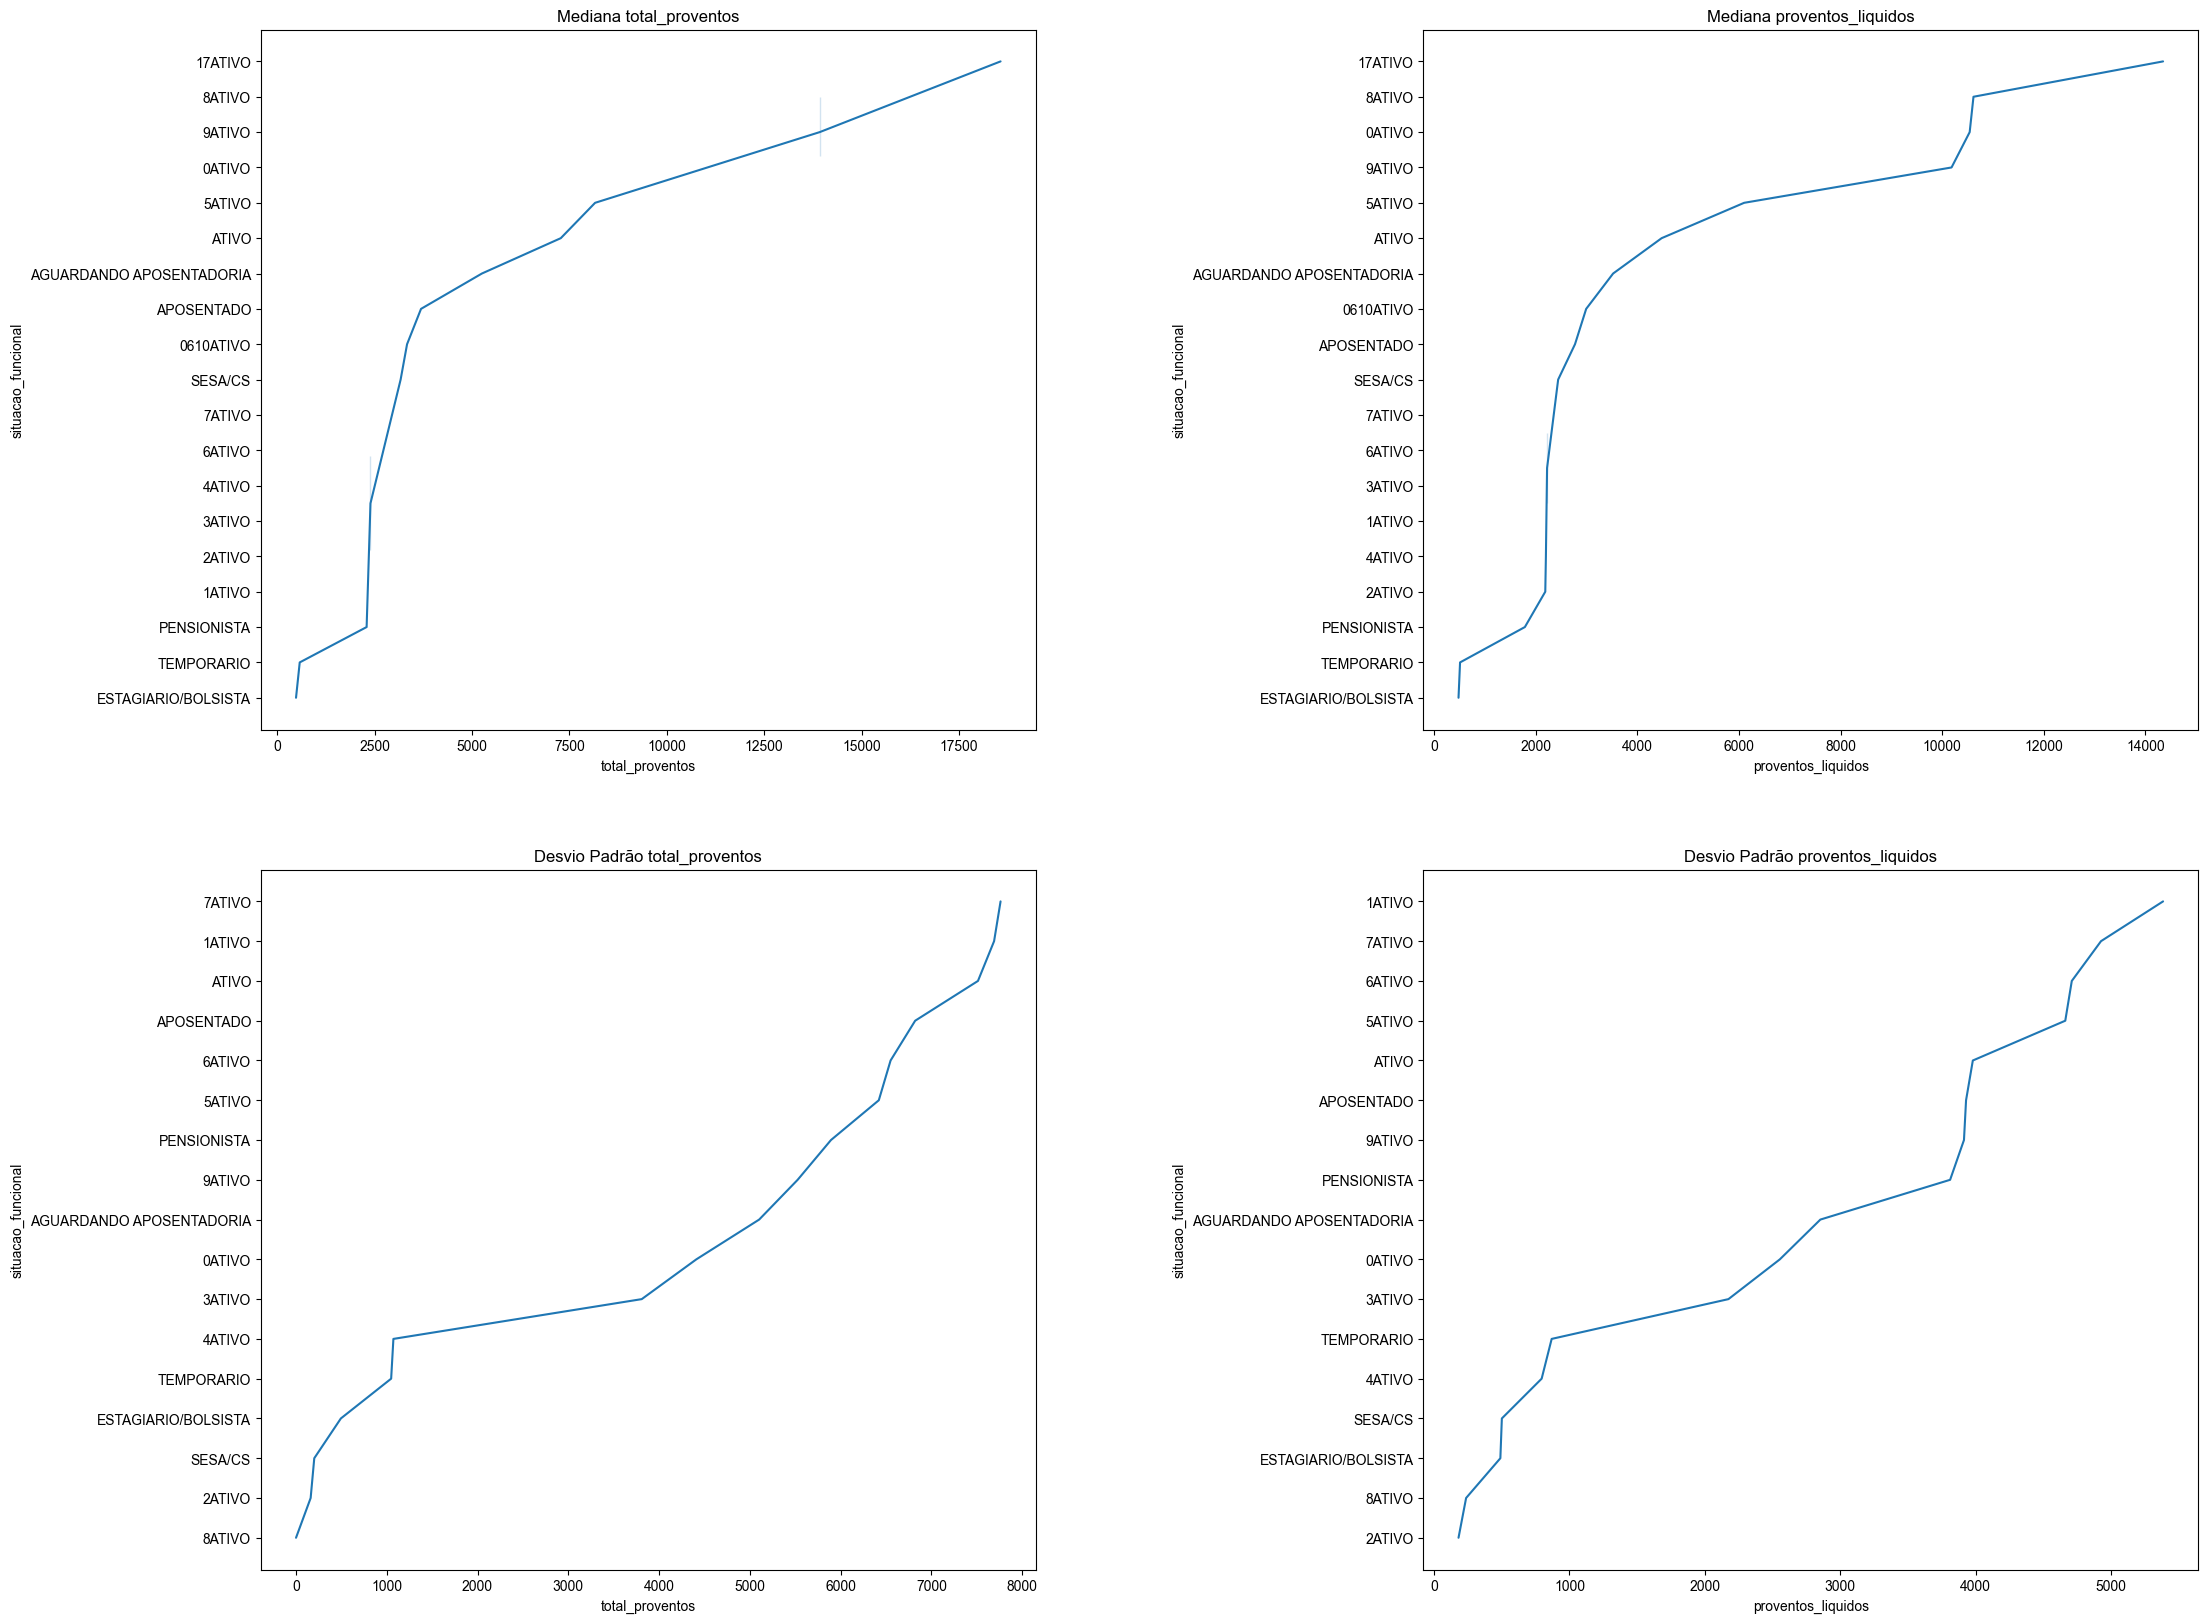

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = situacao_total_top.to_frame()
data2 = situacao_liq_top.to_frame()
data3 = situacao_std_total_top.to_frame()
data4 = situacao_std_liq_top.to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='situacao_funcional')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='situacao_funcional')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='situacao_funcional')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='situacao_funcional')
plot4.set(title='Desvio Padrão proventos_liquidos');


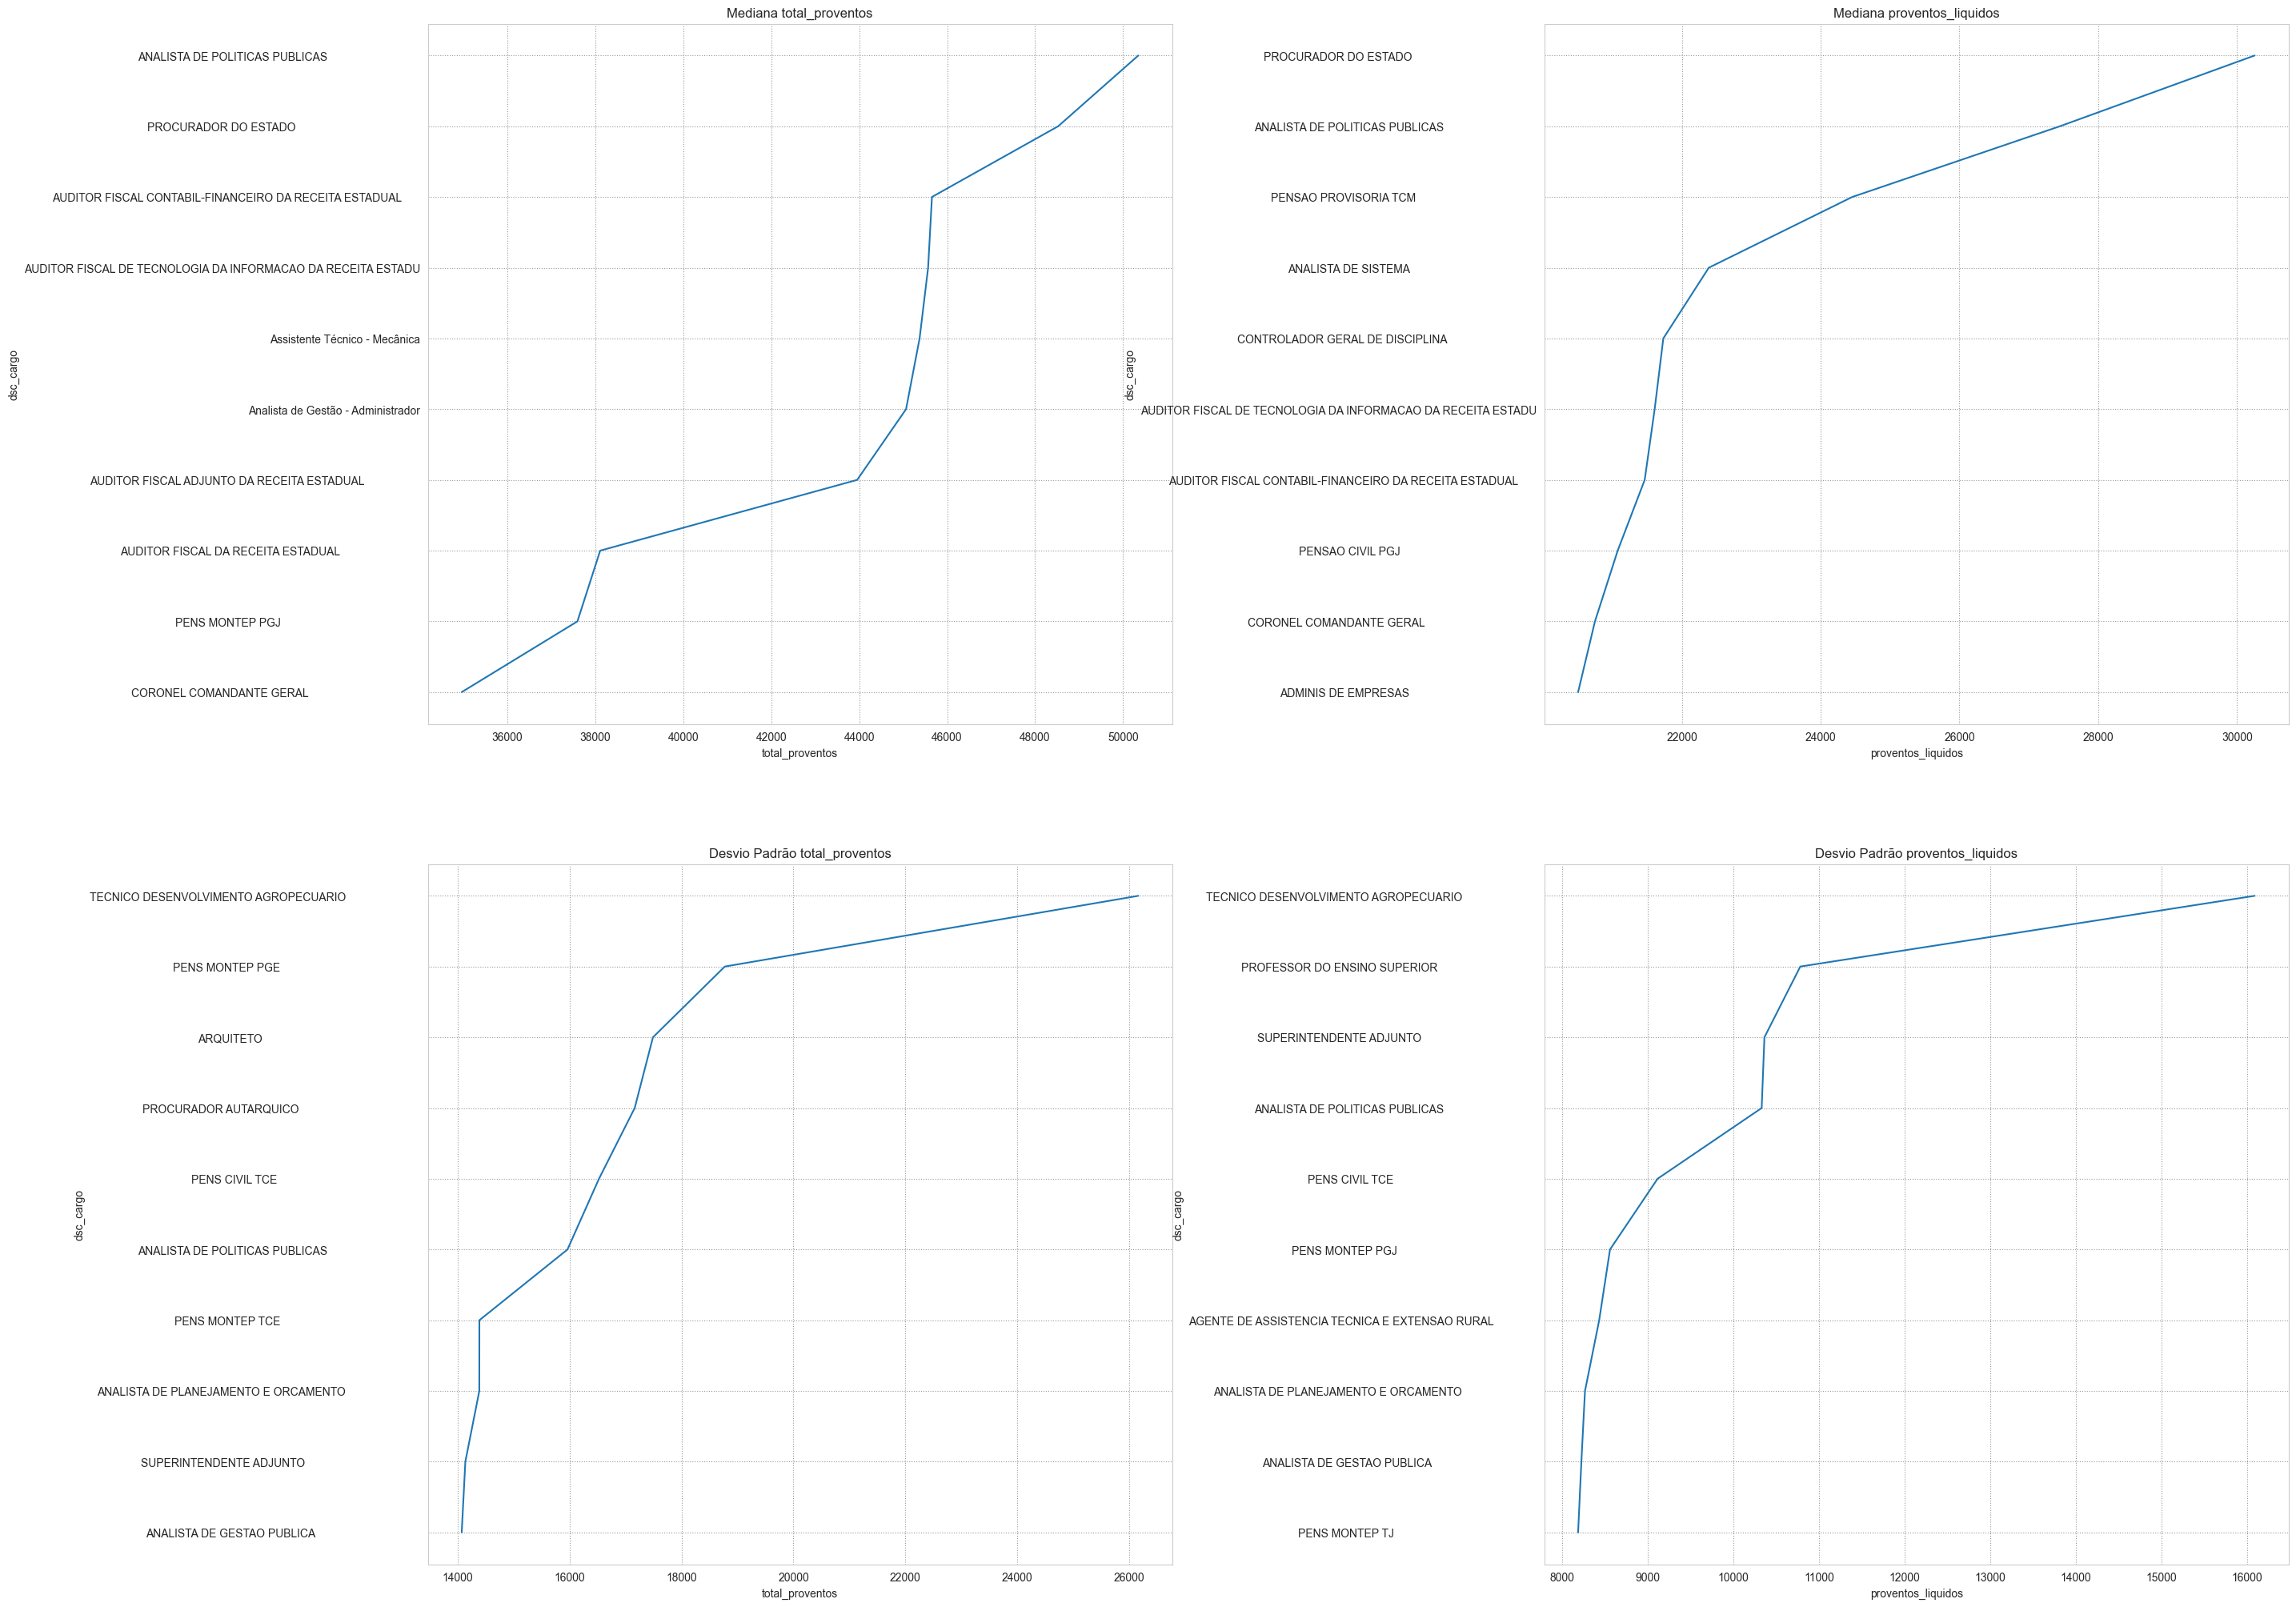

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(30,25))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = cargo_total_top.head(10).to_frame()
data2 = cargo_liq_top.head(10).to_frame()
data3 = cargo_std_total_top.head(10).to_frame()
data4 = cargo_std_liq_top.head(10).to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='dsc_cargo')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='dsc_cargo')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='dsc_cargo')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='dsc_cargo')
plot4.set(title='Desvio Padrão proventos_liquidos');


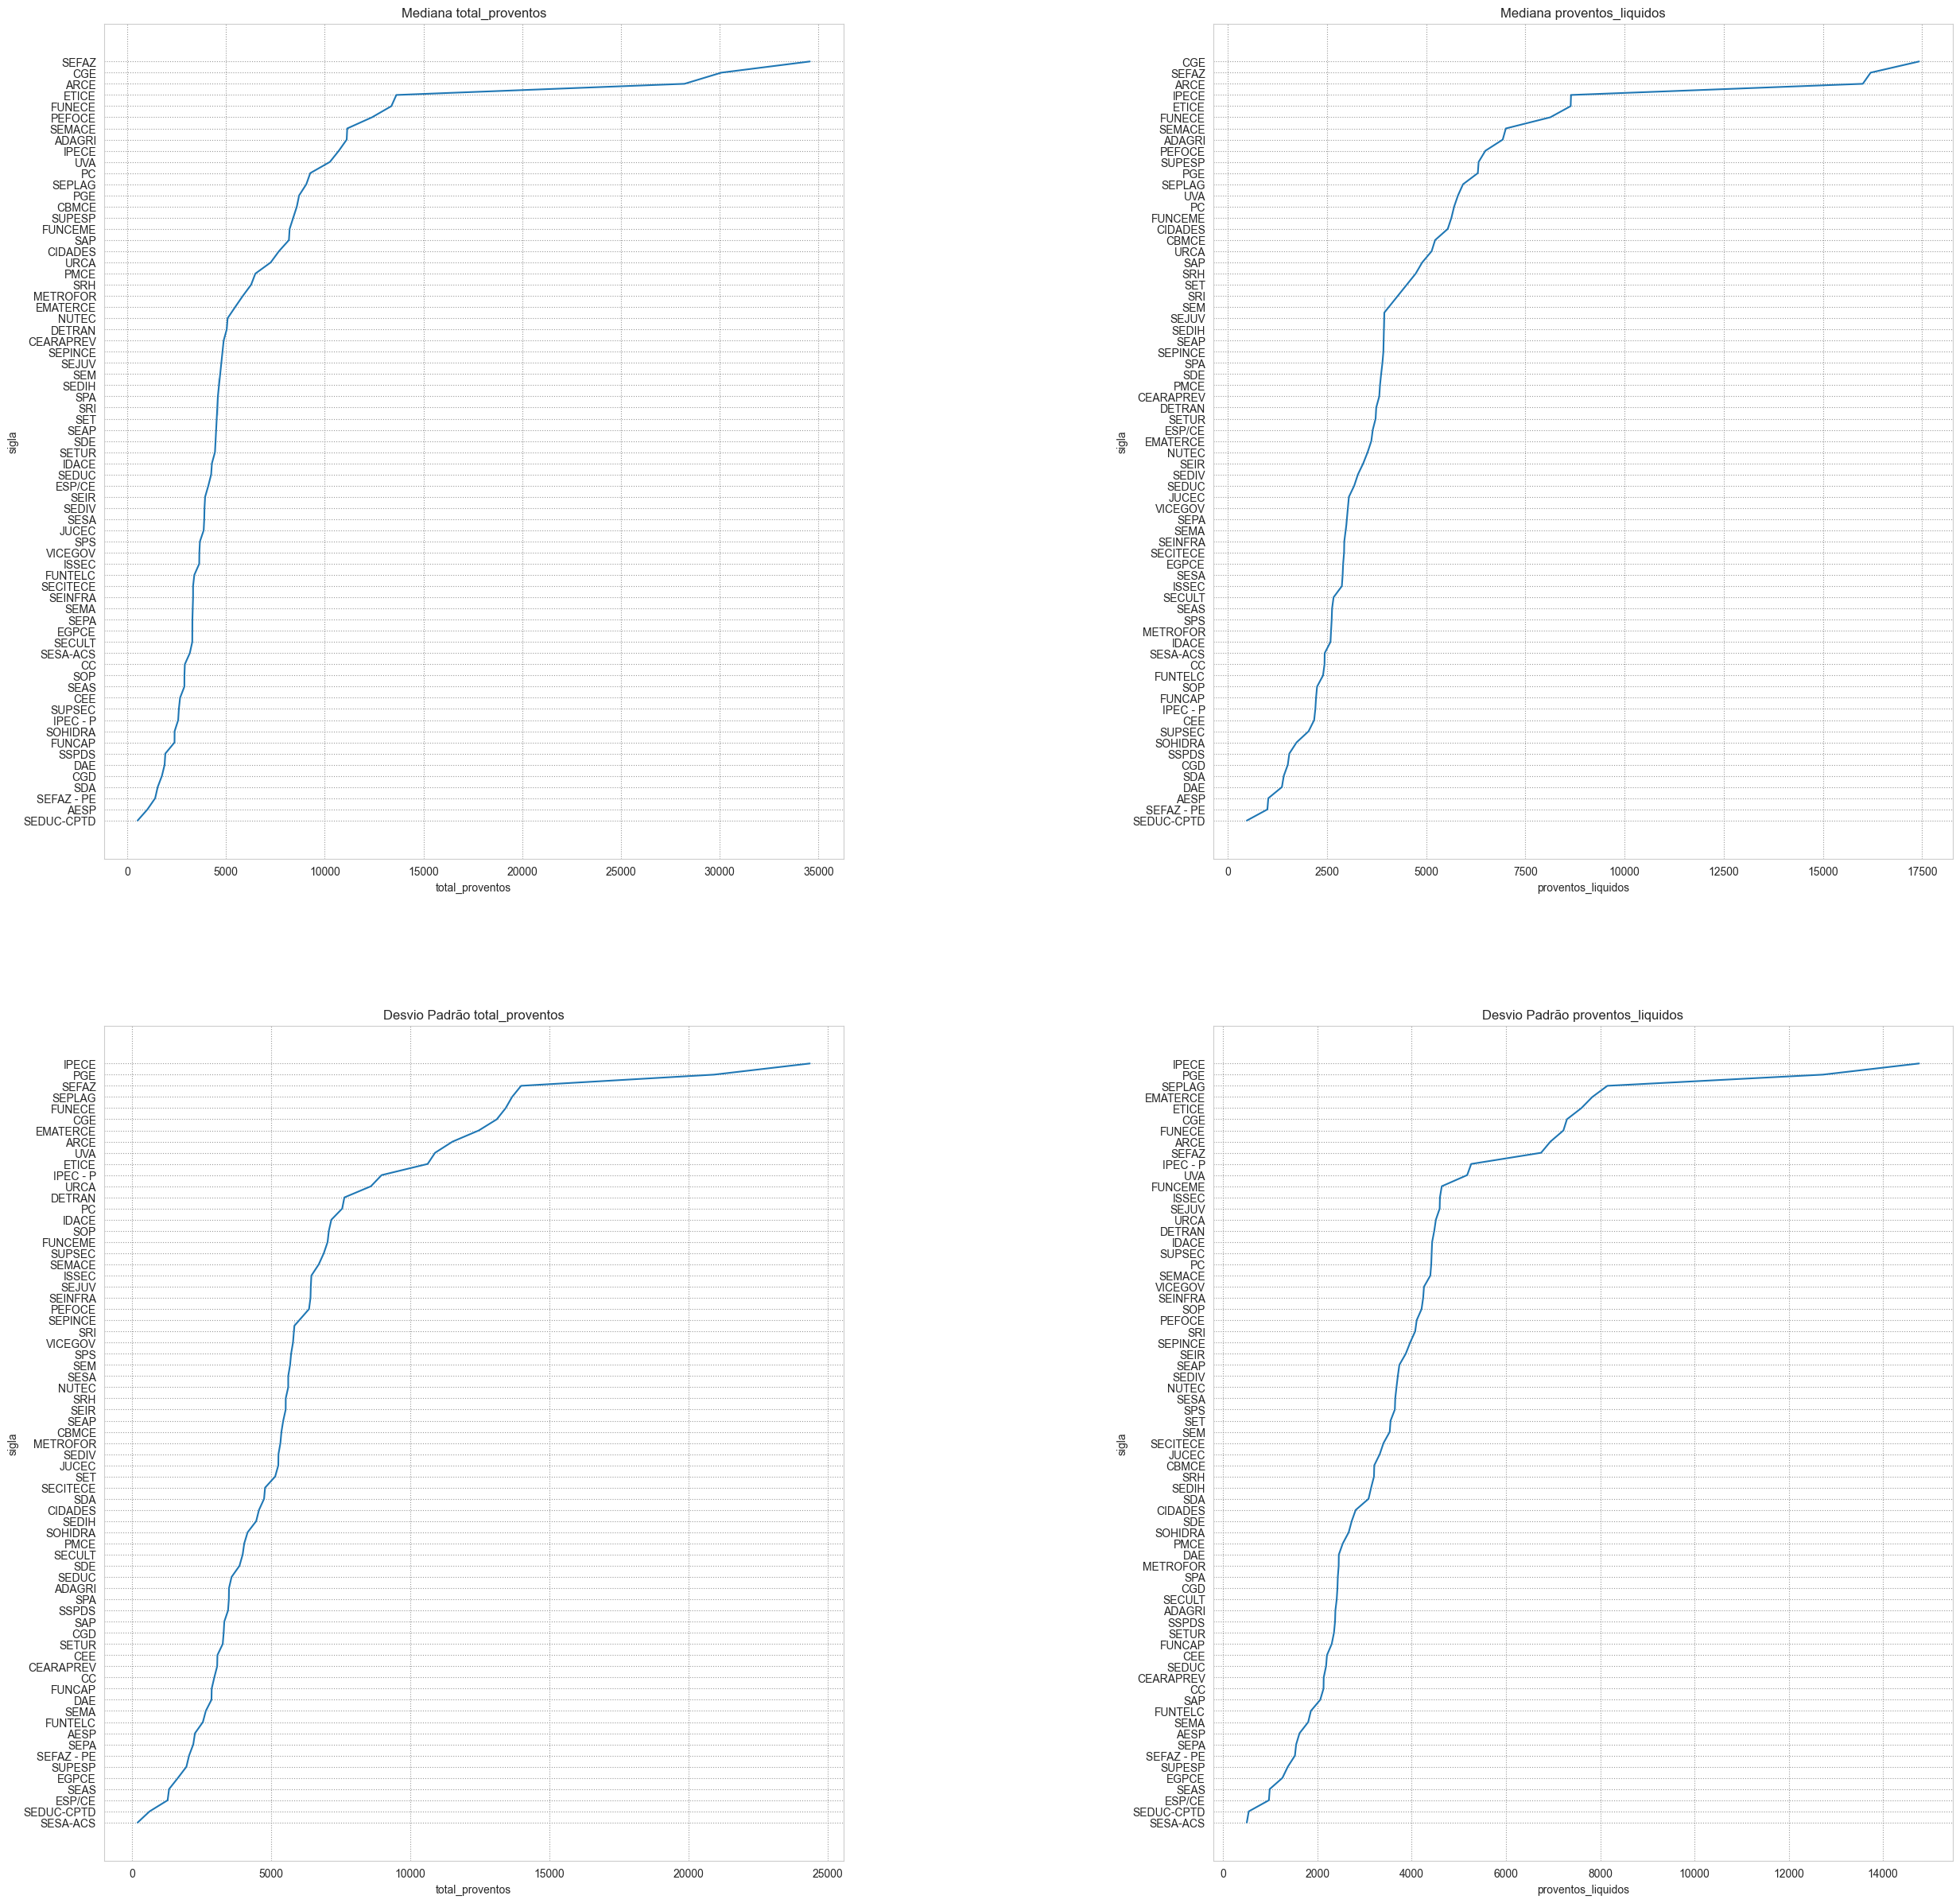

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(30, 30))

#fig.suptitle('Top 5 Valores de Proventos por Situação', size=30.0, ha='center')
fig.subplots_adjust(wspace=0.5)

data1 = sigla_total_top.to_frame()
data2 = sigla_liq_top.to_frame()
data3 = sigla_std_total_top.to_frame()
data4 = sigla_std_liq_top.to_frame()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plot1 = sns.lineplot(ax=axes[0,0], data=data1, x='total_proventos', y='sigla')
plot1.set(title='Mediana total_proventos', );
plot2 = sns.lineplot(ax=axes[0,1], data=data2, x='proventos_liquidos', y='sigla')
plot2.set(title='Mediana proventos_liquidos');
plot3 = sns.lineplot(ax=axes[1,0], data=data3, x='total_proventos', y='sigla')
plot3.set(title='Desvio Padrão total_proventos');
plot4 = sns.lineplot(ax=axes[1,1], data=data4, x='proventos_liquidos', y='sigla')
plot4.set(title='Desvio Padrão proventos_liquidos');


### Análise do Grupo Predominante (Situação)
- Aposentados
- Pensionistas 
- Aguardando aposentadoria

In [50]:
df_grupo_situacao = sqldf('''
    SELECT situacao_funcional,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE situacao_funcional = 'APOSENTADO' OR situacao_funcional = 'PENSIONISTA' OR situacao_funcional = 'AGUARDANDO APOSENTADORIA'
    ''')
df_grupo_situacao_analise = df_grupo_situacao.describe()
df_grupo_situacao_analise = pd.concat([df_grupo_situacao_analise, pd.DataFrame({'total_proventos':df_grupo_situacao['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_situacao['proventos_liquidos'].median()}, index=['median'])])
df_grupo_situacao_analise

,total_proventos,proventos_liquidos
count,53405.000000,53405.000000
mean,5565.250814,3726.564544
std,6393.387402,3765.811589
min,62.400000,0.000000
25%,1485.180000,1380.790000
50%,3635.700000,2624.950000
75%,7483.410000,4596.600000
max,91854.460000,48996.380000
median,3635.700000,2624.950000


In [51]:
df_grupo_situacao['situacao_funcional'].value_counts(normalize=True)

situacao_funcional
APOSENTADO                  0.589065
PENSIONISTA                 0.253141
AGUARDANDO APOSENTADORIA    0.157794
Name: proportion, dtype: float64

### Análise do Grupo Predominante (Cargos)
- Professores (efetivos ou substitutos)

In [52]:
df_grupo_cargo = sqldf('''
    SELECT dsc_cargo,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE dsc_cargo like 'PROF%'
    ''')
df_grupo_cargo_analise = df_grupo_cargo.describe()
df_grupo_cargo_analise = pd.concat([df_grupo_cargo_analise, pd.DataFrame({'total_proventos':df_grupo_cargo['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_cargo['proventos_liquidos'].median()}, index=['median'])])
df_grupo_cargo_analise

,total_proventos,proventos_liquidos
count,41241.000000,41241.000000
mean,5129.430990,3402.764090
std,5386.475669,3159.223296
min,0.030000,0.000000
25%,925.030000,802.190000
50%,3804.780000,2894.930000
75%,8277.500000,5003.700000
max,82077.740000,48996.380000
median,3804.780000,2894.930000


In [53]:
df_grupo_cargo['dsc_cargo'].value_counts(normalize=True)

dsc_cargo
PROFESSOR                                                       0.646784
PROF CTPD LP                                                    0.295143
PROF CTPD 7 SEM                                                 0.020295
PROF CTPD BACHA                                                 0.012342
PROFESSOR ENSINO TECNICO                                        0.008753
PROF TEMPORARIO                                                 0.005941
PROF CTPD PEDAG                                                 0.004777
PROF SUBSTITUTO                                                 0.003225
PROFESSOR COORDENADOR DE ENSINO                                 0.001212
PROFESSOR AUTOR                                                 0.000509
PROF ENS 1 GRAU                                                 0.000461
PROFESSOR DA ACADEMIA DE POLICIA CIVIL                          0.000412
PROFESSOR DO ENSINO SUPERIOR                                    0.000121
PROF C E PL II                           

### Análise do Grupo Predominante (Siglas)
- SEDUC
- SEDUC-CPTD

In [54]:
df_grupo_sigla = sqldf('''
    SELECT sigla,
    total_proventos,
    proventos_liquidos
    FROM df_ 
    WHERE sigla like 'SEDUC%'
    ''')
df_grupo_sigla_analise = df_grupo_sigla.describe()
df_grupo_sigla_analise = pd.concat([df_grupo_sigla_analise, pd.DataFrame({'total_proventos':df_grupo_sigla['total_proventos'].median(),
                                          'proventos_liquidos': df_grupo_sigla['proventos_liquidos'].median()}, index=['median'])])
df_grupo_sigla_analise

,total_proventos,proventos_liquidos
count,49118.000000,49118.000000
mean,4014.405128,2758.777897
std,3694.946978,2304.453248
min,0.030000,0.000000
25%,1233.390000,883.192500
50%,2394.030000,2150.520000
75%,6433.350000,4158.527500
max,28756.930000,19141.380000
median,2394.030000,2150.520000


In [55]:
df_grupo_sigla['sigla'].value_counts(normalize=True)

sigla
SEDUC         0.720774
SEDUC-CPTD    0.279226
Name: proportion, dtype: float64